# __Proyek Analisis Data: [Air Quality Dataset Changping-Aotizhongxin]__


- **Nama:** [Muhammad Faiz Ramadhan]
- **Email:** [m004b4ky2813@bangkit.academy]
- **ID Dicoding:** [aaiizr1]

## __Menentukan Pertanyaan Bisnis__

1. Bagaimana kualitas udara (khususnya tingkat PM2.5 dan PM10) bervariasi pada waktu yang berbeda sepanjang tahun di Changping dan Aotizhongxin?
2. Apa korelasi antara kondisi cuaca (misalnya, suhu, kecepatan angin, dan tekanan) dan tingkat polusi di wilayah ini?
3. Apakah ada korelasi antara berbagai polutan udara (SO2, NO2, CO, O3)?
4. Bagaimana konsentrasi polutan udara di berbagai lokasi stasiun?
5. Apakah ada tren atau pola yang terlihat pada tingkat polutan sepanjang tahun?
6. Pada stasiun mana suhu mencapai derajat terendah dan tertingginya?
7. Pada stasiun mana curah hujan mencapai volume tertingginya?

## __Import Semua Packages/Library yang Digunakan__

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline
sns.set(style="whitegrid")

## __Data Wrangling__

### Gathering Data

In [181]:
# Read the data
data_aotizhongxin = pd.read_csv(
    'data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
data_changping = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')

# Check the first few rows of the datasets to understand their structure
data_aotizhongxin.head(), data_changping.head()

(   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
 1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
 2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
 3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
 4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
 
      PRES  DEWP  RAIN   wd  WSPM       station  
 0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
 1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
 2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
 3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
 4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  ,
    No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
 1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.

**Insight:**
- Data ini berisi informasi rinci tentang kualitas udara di dua lokasi di Beijing (Aotizhongxin dan Changping) selama lima tahun (2013-2017).
- Data meliputi berbagai jenis polutan, kondisi cuaca, dan informasi waktu yang dikumpulkan setiap jam.

### Menilai Data

In [182]:
data_aotizhongxin.info(), data_changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 t

(None, None)

### Menggabungkan kedua data

In [183]:
df = pd.concat([data_aotizhongxin, data_changping], ignore_index=True)

print(f"Jumlah baris setelah penggabungan: {df.shape[0]}")
print(f"Jumlah kolom setelah penggabungan: {df.shape[1]}")

Jumlah baris setelah penggabungan: 70128
Jumlah kolom setelah penggabungan: 18


### Pemisahan data berdasarkan numerical dan categorical

In [184]:
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
                'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
categorical_cols = ['wd', 'station']

### Cek data duplikat

In [185]:
duplicate_rows = df[df.duplicated()]

print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")

Jumlah baris duplikat: 0


In [186]:
print(df[numeric_cols].dtypes)
print(df[categorical_cols].dtypes)

PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
TEMP     float64
PRES     float64
DEWP     float64
RAIN     float64
WSPM     float64
dtype: object
wd         object
station    object
dtype: object


### Cek missing value data

In [187]:
missing_values = df.isnull().sum()

print(f"Jumlah nilai yang hilang:\n{missing_values}")

Jumlah nilai yang hilang:
No            0
year          0
month         0
day           0
hour          0
PM2.5      1699
PM10       1300
SO2        1563
NO2        1690
CO         3297
O3         2323
TEMP         73
PRES         70
DEWP         73
RAIN         71
wd          221
WSPM         57
station       0
dtype: int64


visualisasi data yang hilang

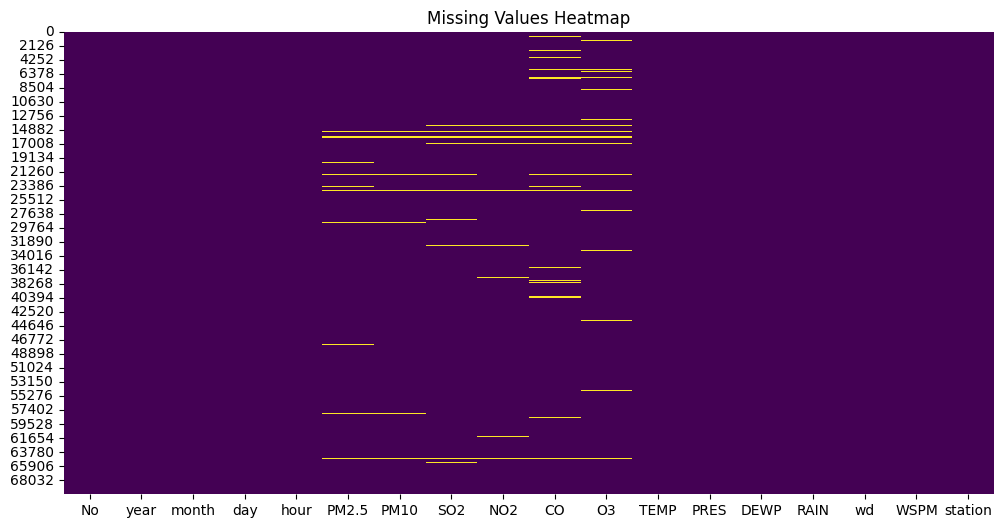

In [188]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### Konversi tipe data

In [189]:
print('tipe data sebelum diubah\n', df.dtypes)

tipe data sebelum diubah
 No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [190]:
df['wd'] = df['wd'].astype('category')
df['station'] = df['station'].astype('category')

print('tipe data setelah diubah\n', df.dtypes)

tipe data setelah diubah
 No            int64
year          int64
month         int64
day           int64
hour          int64
PM2.5       float64
PM10        float64
SO2         float64
NO2         float64
CO          float64
O3          float64
TEMP        float64
PRES        float64
DEWP        float64
RAIN        float64
wd         category
WSPM        float64
station    category
dtype: object


### Imputasi Data

In [191]:
from sklearn.impute import KNNImputer
df_imputed = df.copy()

imputer = KNNImputer(n_neighbors=5, weights='uniform')
df_imputed[numeric_cols] = pd.DataFrame(
    imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

In [192]:
print(
    f"Jumlah nilai yang hilang setelah imputasi:\n{df_imputed.isnull().sum()}")

Jumlah nilai yang hilang setelah imputasi:
No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         221
WSPM         0
station      0
dtype: int64


In [202]:
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for pol in polutan:
    assert (df_imputed[pol] >= 0).all(), f"Nilai {pol} tidak boleh negatif"

In [194]:
wd_mode = df_imputed['wd'].mode()[0]

df_imputed['wd'].fillna(wd_mode, inplace=True)

print(
    f"Jumlah nilai yang hilang setelah imputasi:\n{df_imputed.isnull().sum()}")

Jumlah nilai yang hilang setelah imputasi:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20112\1725132692.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['wd'].fillna(wd_mode, inplace=True)


In [217]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70128 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   No       70128 non-null  int64   
 1   year     70128 non-null  int64   
 2   month    70128 non-null  int64   
 3   day      70128 non-null  int64   
 4   hour     70128 non-null  int64   
 5   PM2.5    70128 non-null  float64 
 6   PM10     70128 non-null  float64 
 7   SO2      70128 non-null  float64 
 8   NO2      70128 non-null  float64 
 9   CO       70128 non-null  float64 
 10  O3       70128 non-null  float64 
 11  TEMP     70128 non-null  float64 
 12  PRES     70128 non-null  float64 
 13  DEWP     70128 non-null  float64 
 14  RAIN     70128 non-null  float64 
 15  wd       70128 non-null  category
 16  WSPM     70128 non-null  float64 
 17  station  70128 non-null  category
dtypes: category(2), float64(11), int64(5)
memory usage: 9.2 MB


## Exploratory Data Analysis

Menambahkan kolom datetime

In [211]:
df_imputed['datetime'] = pd.to_datetime(
    df_imputed[['year', 'month', 'day', 'hour']])
df_imputed.set_index('datetime', inplace=True)

In [219]:
print(df_imputed[numeric_cols].describe())

              PM2.5          PM10           SO2           NO2            CO  \
count  70128.000000  70128.000000  70128.000000  70128.000000  70128.000000   
mean      77.084388    102.326112     16.144873     51.652409   1206.474892   
std       77.195438     89.319297     21.782311     34.145246   1154.877945   
min        2.000000      2.000000      0.285600      1.847700    100.000000   
25%       20.000000     36.000000      3.000000     25.000000    500.000000   
50%       53.000000     79.000000      8.000000     44.000000    800.000000   
75%      107.000000    142.000000     20.000000     71.000000   1500.000000   
max      898.000000    999.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  70128.000000  70128.000000  70128.000000  70128.000000  70128.000000   
mean      57.205039     13.634289   1009.807181      2.313708      0.063837   
std       55.523509     11.378279     10.512368    

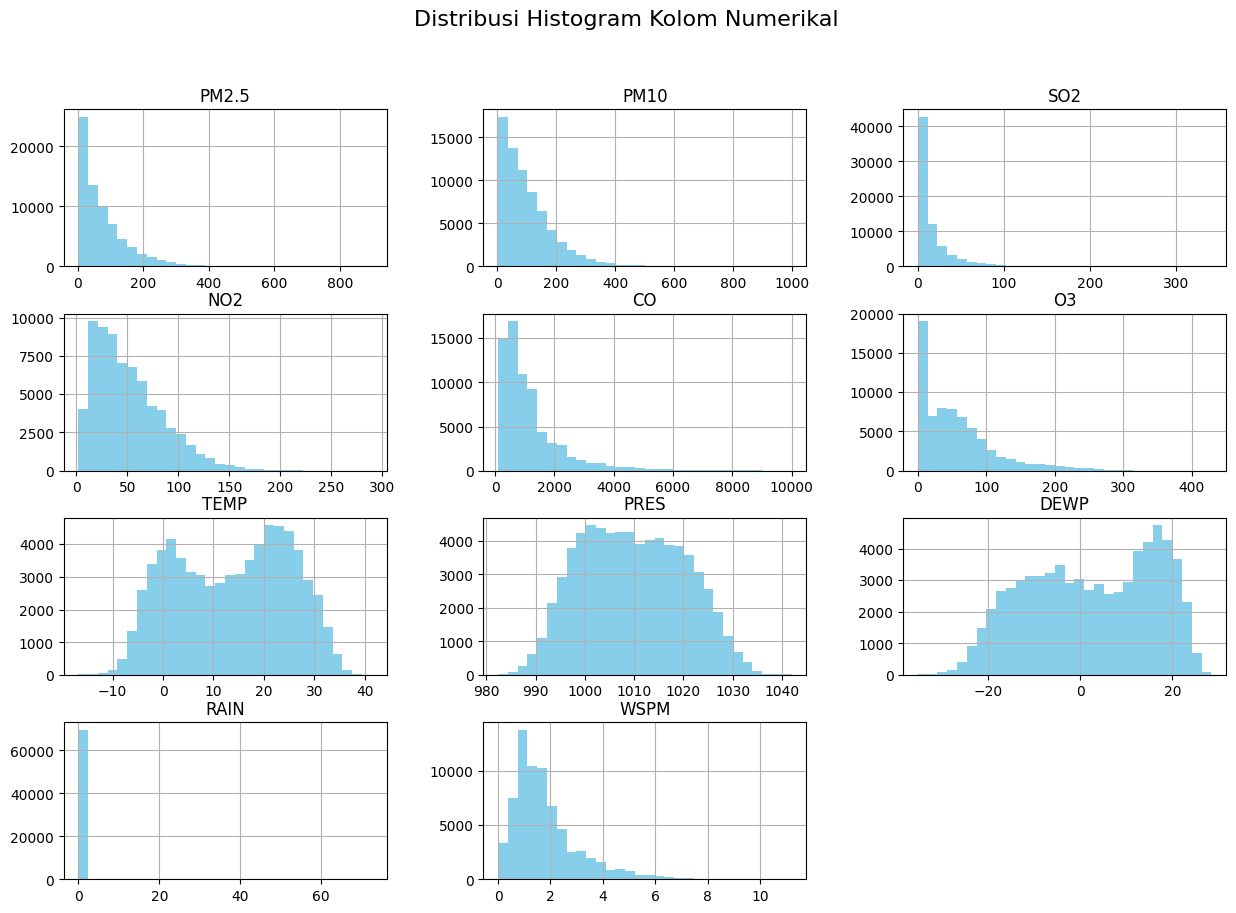

In [220]:
df_imputed[numeric_cols].hist(bins=30, figsize=(
    15, 10), layout=(4, 3), color='skyblue')
plt.suptitle('Distribusi Histogram Kolom Numerikal', fontsize=16)
plt.show()

- Sebagian besar polutan menunjukkan konsentrasi rendah, tetapi dengan beberapa kejadian outlier.
- Parameter meteorologi seperti suhu (TEMP) dan tekanan udara (PRES) menunjukkan distribusi yang stabil, mencerminkan kondisi atmosfer yang normal.
- Curah hujan dan kecepatan angin rendah pada sebagian besar waktu, menunjukkan bahwa kondisi atmosfer sering kali tenang, yang mungkin memengaruhi penyebaran polutan.

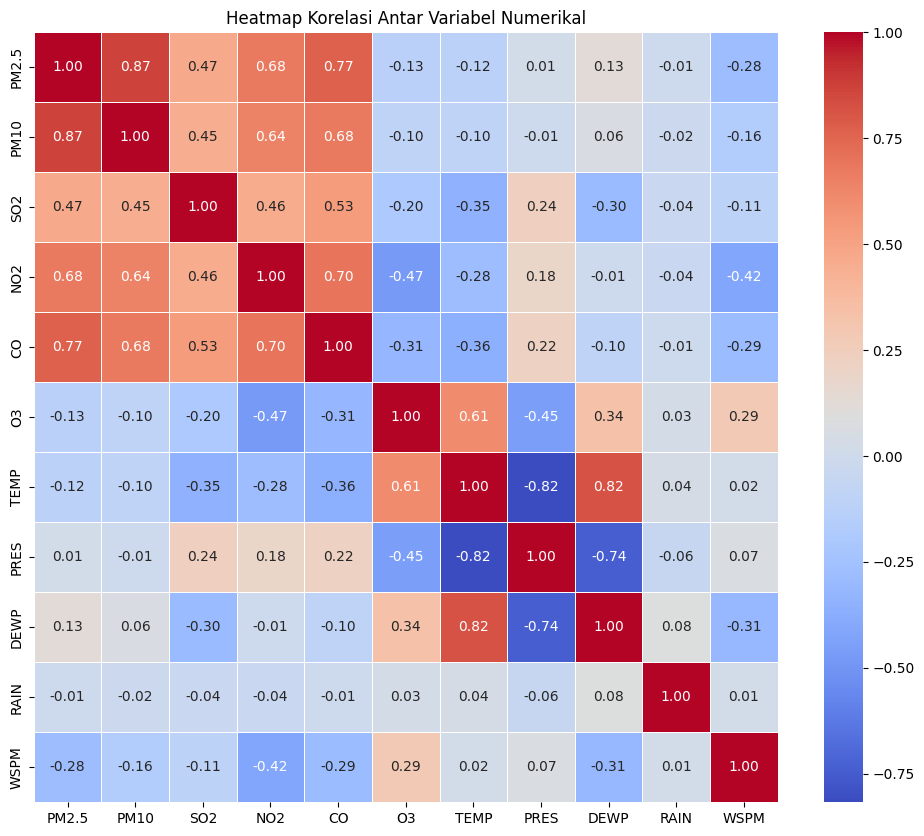

In [223]:
# Menghitung matriks korelasi
correlation_matrix = df_imputed[numeric_cols].corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
            cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerikal')
plt.show()

- PM2.5 dan PM10: Korelasi sangat kuat (+0.87), menunjukkan bahwa keduanya cenderung meningkat atau menurun bersama.
- PM2.5 dan CO: Korelasi tinggi (+0.77), menunjukkan hubungan erat.
- PM2.5 dan NO2: Korelasi moderat tinggi (+0.68), menunjukkan hubungan signifikan.
- TEMP dan PRES: Korelasi negatif kuat (-0.82), mencerminkan hubungan terbalik alami antara suhu dan tekanan udara.

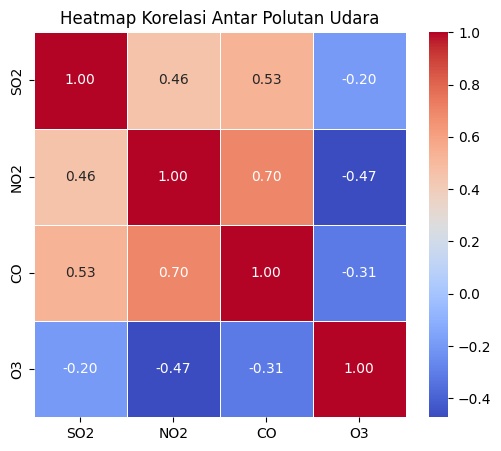

In [226]:
pollutant_cols = ['SO2', 'NO2', 'CO', 'O3']

# Menghitung korelasi antar polutan
pollutant_corr = df_imputed[pollutant_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(pollutant_corr, annot=True, fmt=".2f",
            cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Polutan Udara')
plt.show()

1. SO2 dan NO2: Korelasi moderat positif (+0.46), menunjukkan bahwa kedua polutan sering berasal dari sumber yang sama.
2. SO2 dan CO: Korelasi moderat positif (+0.53), mengindikasikan hubungan yang cukup signifikan.
3. NO2 dan CO: Korelasi kuat positif (+0.70), menunjukkan keduanya sering dihasilkan dari emisi kendaraan bermotor atau proses industri.
4. O3 dan polutan lain (SO2, NO2, CO): Korelasi negatif (SO2: -0.20, NO2: -0.47, CO: -0.31), menunjukkan bahwa konsentrasi ozon (O3) cenderung lebih tinggi di lingkungan yang kurang terpolusi oleh polutan primer. Ini karena ozon terbentuk secara fotokimia melalui reaksi senyawa volatil organik (VOCs) dan oksida nitrogen (NOx) di bawah sinar matahari.

C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20112\108817671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_imputed, x='wd', palette='Set3')


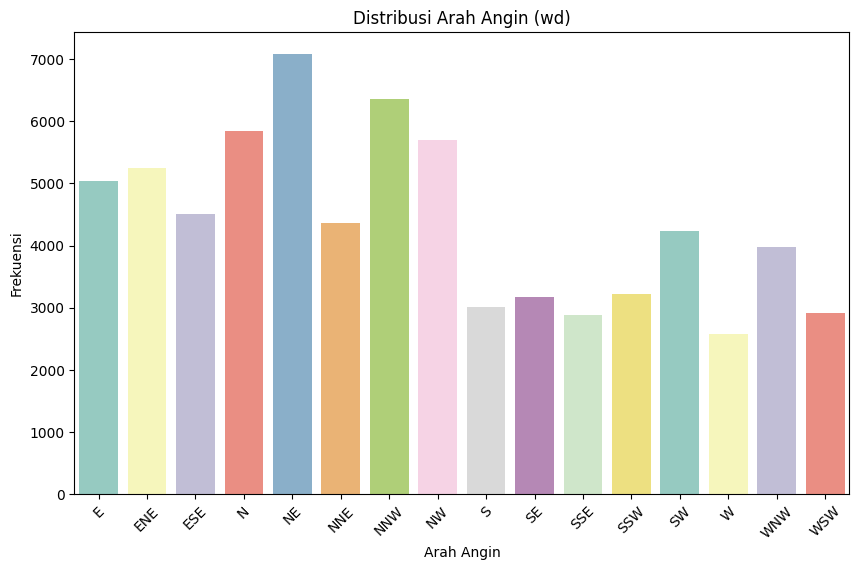

In [232]:
# Count plot untuk Wind Direction
plt.figure(figsize=(10, 6))
sns.countplot(data=df_imputed, x='wd', palette='Set3')
plt.title('Distribusi Arah Angin (wd)')
plt.xlabel('Arah Angin')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

- NE (Timur Laut) memiliki frekuensi tertinggi, menunjukkan angin lebih sering berasal dari arah ini.
- Angin dari arah S (Selatan) dan SSE (Tenggara) lebih jarang terjadi dibandingkan arah lainnya.

C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20112\851958499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_imputed, x='wd', y='PM2.5', palette='Pastel1')


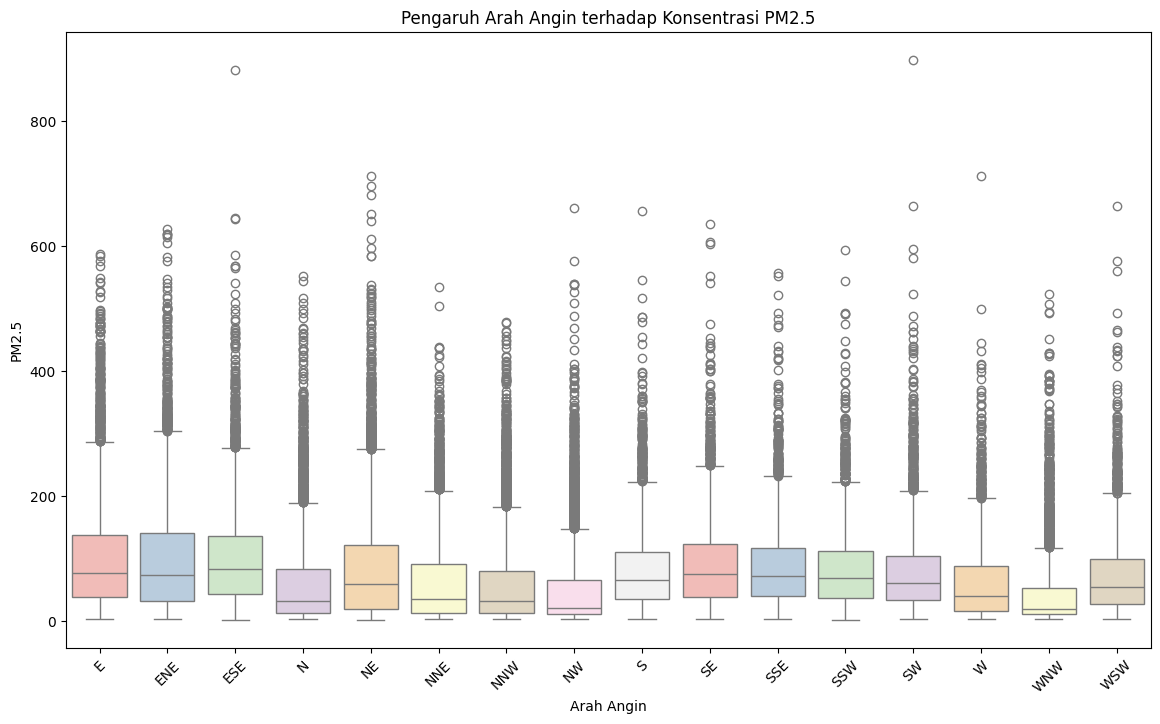

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_imputed, x='wd', y='PM2.5', palette='Pastel1')
plt.title('Pengaruh Arah Angin terhadap Konsentrasi PM2.5')
plt.xlabel('Arah Angin')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.show()

- Konsentrasi PM2.5 tidak jauh berbeda berdasarkan arah angin, tetapi arah tertentu seperti N dan NE menunjukkan lebih banyak kejadian polusi ekstrem.
- Peristiwa polusi tinggi (>400) perlu diteliti lebih lanjut untuk memahami penyebabnya, misalnya, kegiatan industri, kendaraan, atau kondisi cuaca ekstrem.

### Save data to CSV

In [264]:
# Pastikan 'datetime' sebagai kolom biasa
if isinstance(df_imputed.index, pd.DatetimeIndex):
    df_datetime_cols = df_imputed.reset_index()

# Hapus kolom 'No'
if 'No' in df_datetime_cols.columns:
    df_datetime_cols = df_datetime_cols.drop(columns=['No'])

# Simpan DataFrame ke file CSV
df_datetime_cols.to_csv('dashboard/combined_data.csv', index=False)

## Visualisasi

### Pertanyaan bisnis 1

Bagaimana kualitas udara (khususnya tingkat PM2.5 dan PM10) bervariasi pada waktu yang berbeda sepanjang tahun di Changping dan Aotizhongxin?

C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20112\3851000194.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_imputed.groupby(['station', pd.Grouper(freq='M')])[
C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20112\3851000194.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = df_imputed.groupby(['station', pd.Grouper(freq='M')])[


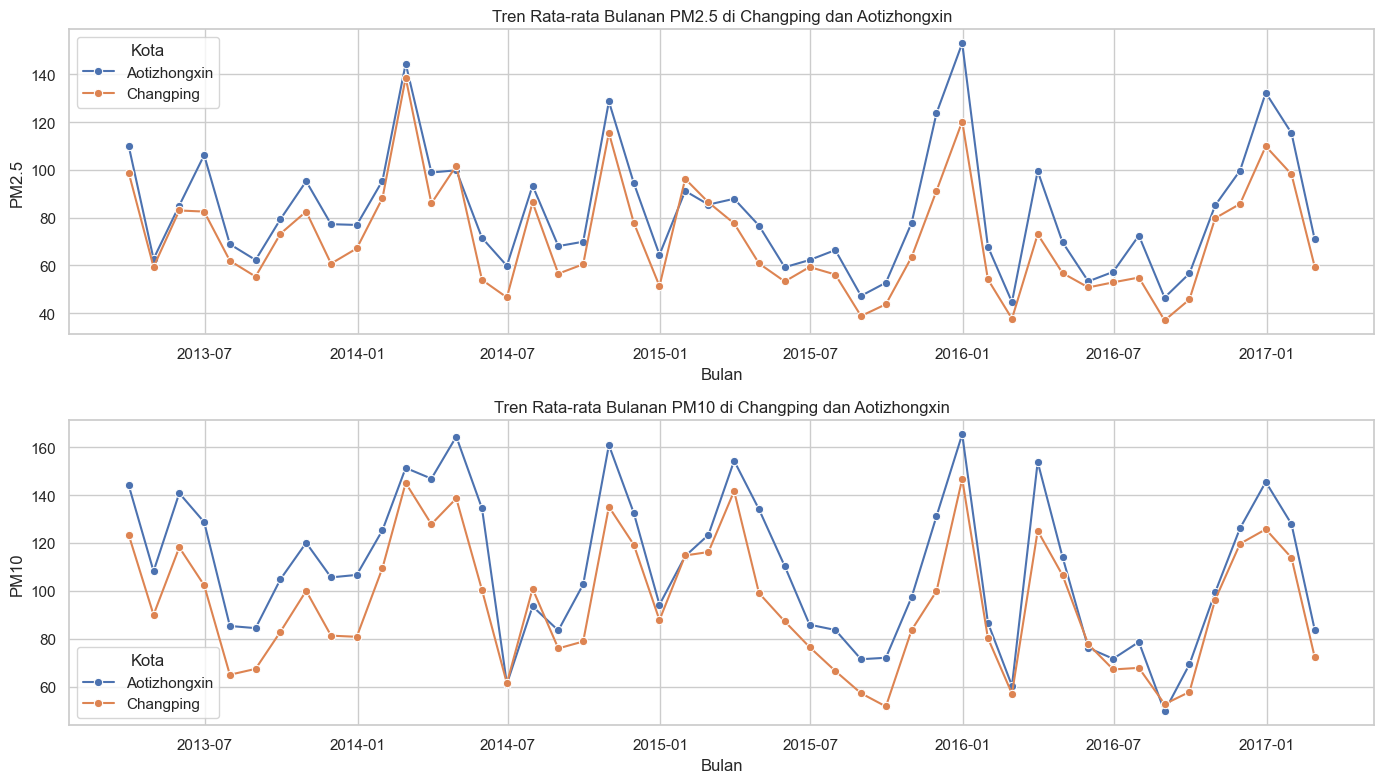

In [237]:
# Menghitung Rata-rata PM2.5 dan PM10 per Bulan untuk Setiap Kota
monthly_avg = df_imputed.groupby(['station', pd.Grouper(freq='M')])[
    ['PM2.5', 'PM10']].mean().reset_index()

# Visualisasi Tren Bulanan
plt.figure(figsize=(14, 8))

# PM2.5
plt.subplot(2, 1, 1)
sns.lineplot(data=monthly_avg, x='datetime',
             y='PM2.5', hue='station', marker='o')
plt.title('Tren Rata-rata Bulanan PM2.5 di Changping dan Aotizhongxin')
plt.xlabel('Bulan')
plt.ylabel('PM2.5')
plt.legend(title='Kota')

# PM10
plt.subplot(2, 1, 2)
sns.lineplot(data=monthly_avg, x='datetime',
             y='PM10', hue='station', marker='o')
plt.title('Tren Rata-rata Bulanan PM10 di Changping dan Aotizhongxin')
plt.xlabel('Bulan')
plt.ylabel('PM10')
plt.legend(title='Kota')

plt.tight_layout()
plt.show()

- Musim Dingin (Desember - Februari): Baik PM2.5 maupun PM10 meningkat signifikan, menunjukkan kualitas udara yang memburuk. Hal ini dapat meningkatkan risiko kesehatan, terutama bagi individu yang rentan terhadap penyakit pernapasan.
- Musim Panas (Juni - Agustus): Kualitas udara relatif lebih baik dengan tingkat PM2.5 dan PM10 yang lebih rendah, meskipun Aotizhongxin tetap menunjukkan polusi yang lebih tinggi dibandingkan Changping.

### Pertanyaan Bisnis 2

Apa korelasi antara kondisi cuaca (misalnya, suhu, kecepatan angin, dan tekanan) dan tingkat polusi di wilayah ini?

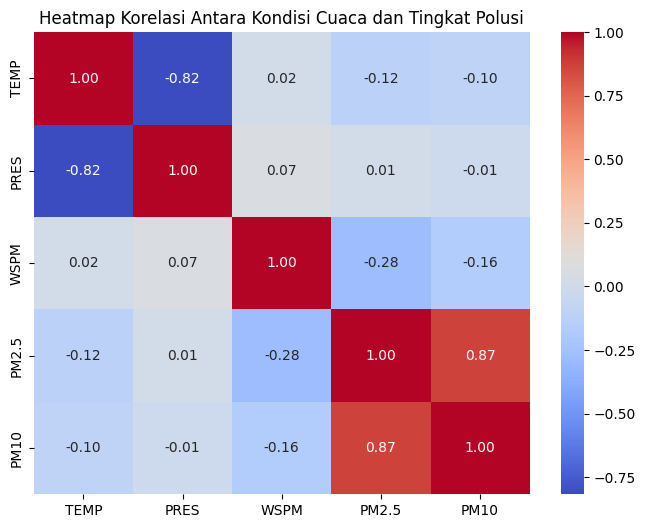

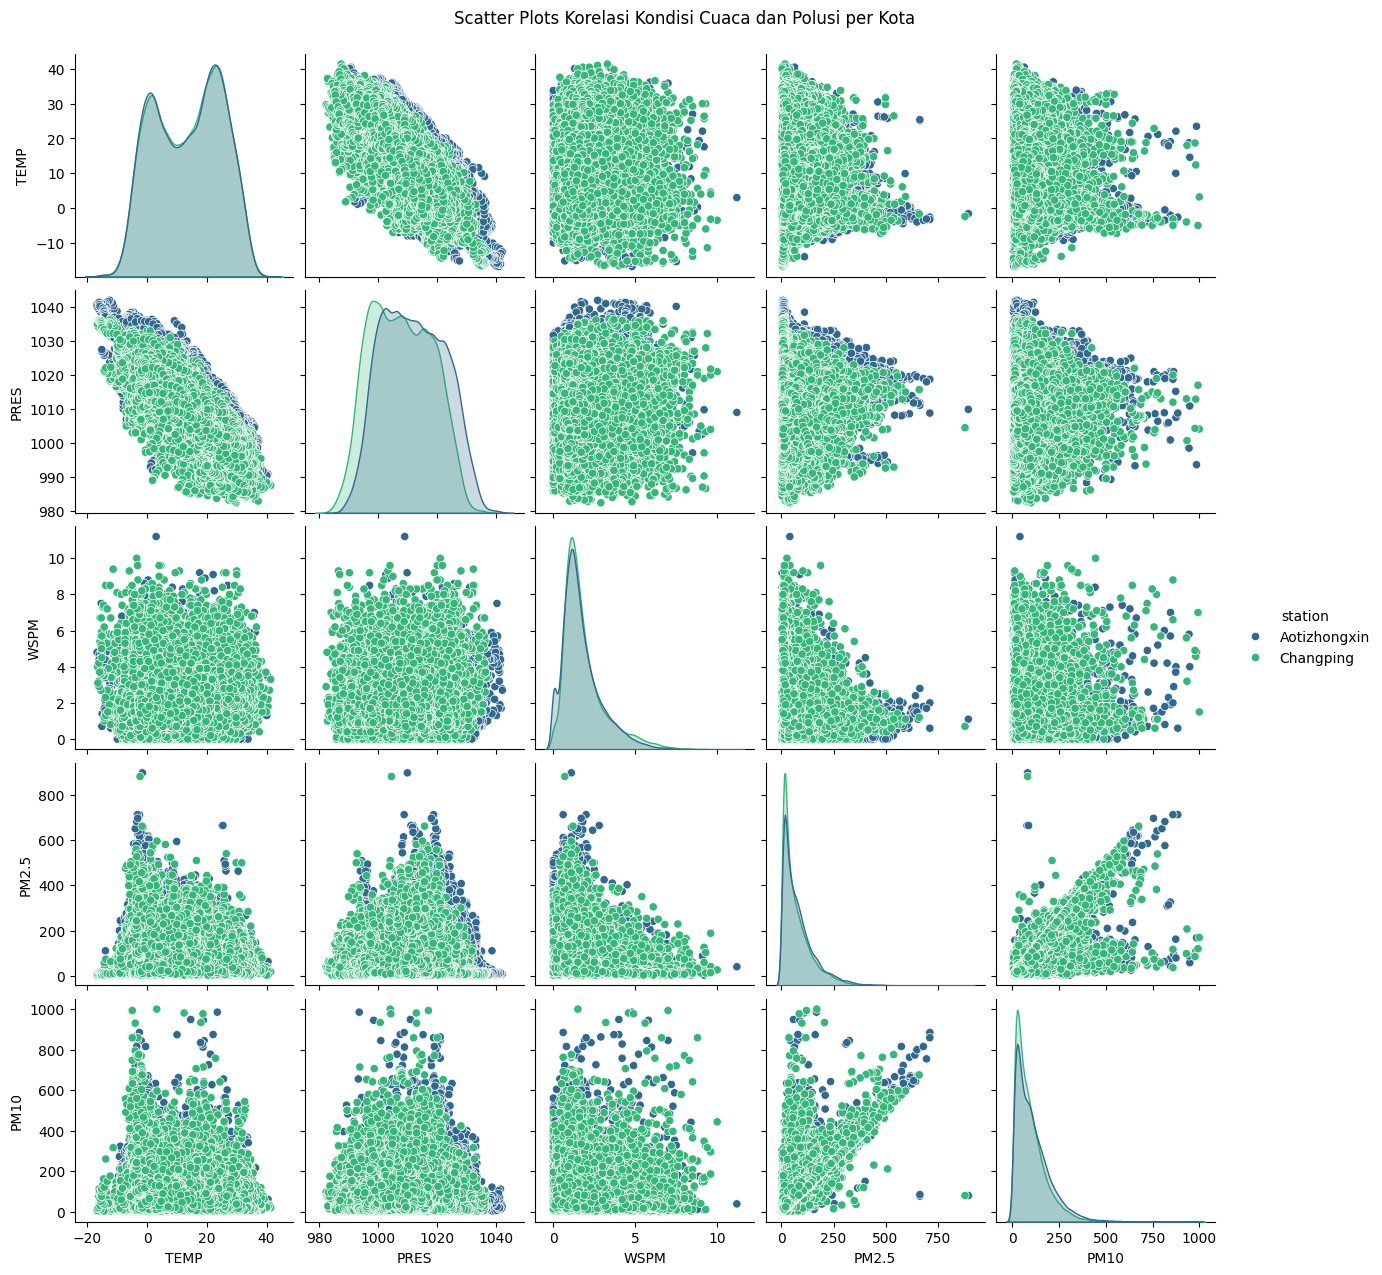

In [200]:
# a. Menghitung Matriks Korelasi
weather_pollutant_cols = ['TEMP', 'PRES', 'WSPM', 'PM2.5', 'PM10']
correlation_matrix = df_imputed[weather_pollutant_cols].corr()

# b. Visualisasi Korelasi dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi Antara Kondisi Cuaca dan Tingkat Polusi')
plt.show()

# c. Analisis Scatter Plots
sns.pairplot(df_imputed, vars=weather_pollutant_cols,
             hue='station', palette='viridis')
plt.suptitle('Scatter Plots Korelasi Kondisi Cuaca dan Polusi per Kota', y=1.02)
plt.show()

- Aotizhongxin cenderung memiliki konsentrasi PM2.5 dan PM10 yang lebih tinggi dibandingkan Changping, terlihat dari distribusi yang lebih lebar pada scatter plot.
- Suhu (TEMP) dan kecepatan angin (WSPM) memiliki dampak signifikan terhadap tingkat polusi, di mana suhu rendah dan kecepatan angin rendah meningkatkan konsentrasi polusi.
- Tekanan udara (PRES) tidak menunjukkan hubungan yang signifikan dengan polusi

### Pertanyaan Bisnis 3

Apakah ada korelasi antara berbagai polutan udara (SO2, NO2, CO, O3)?

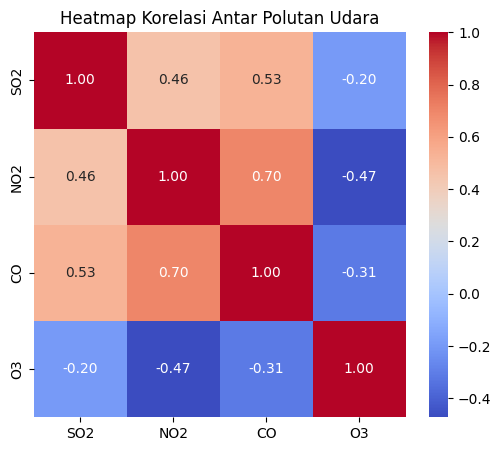

In [201]:
# a. Menghitung Matriks Korelasi Antar Polutan
pollutant_cols = ['SO2', 'NO2', 'CO', 'O3']
pollutant_corr = df_imputed[pollutant_cols].corr()

# b. Visualisasi Korelasi dengan Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(pollutant_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Polutan Udara')
plt.show()

- Polutan Primer:
    - NO2 dan CO menunjukkan hubungan yang kuat, menunjukkan bahwa keduanya berasal dari sumber utama yang sama, seperti emisi kendaraan.
    - SO2 memiliki korelasi moderat dengan NO2 dan CO, mencerminkan kontribusi dari pembakaran bahan bakar fosil.

- Polutan Sekunder (O3):
    - Ozon (O3) memiliki hubungan negatif dengan NO2 dan CO, yang dapat dijelaskan oleh reaksi fotokimia di atmosfer. Ozon terbentuk ketika VOCs (volatile organic compounds) dan NOx bereaksi di bawah sinar matahari, sehingga konsentrasi tinggi NO2 dapat mengurangi ozon di lokasi tertentu.

### Pertanyaan Bisnis 4

Bagaimana konsentrasi polutan udara di berbagai lokasi stasiun?

C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20112\498383872.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station_pollutant_avg = df.groupby('station')[polutan].mean().reset_index()
C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20112\498383872.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='station', y=pol, data=station_pollutant_avg, palette='viridis')
C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20112\498383872.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='station', y=pol, d

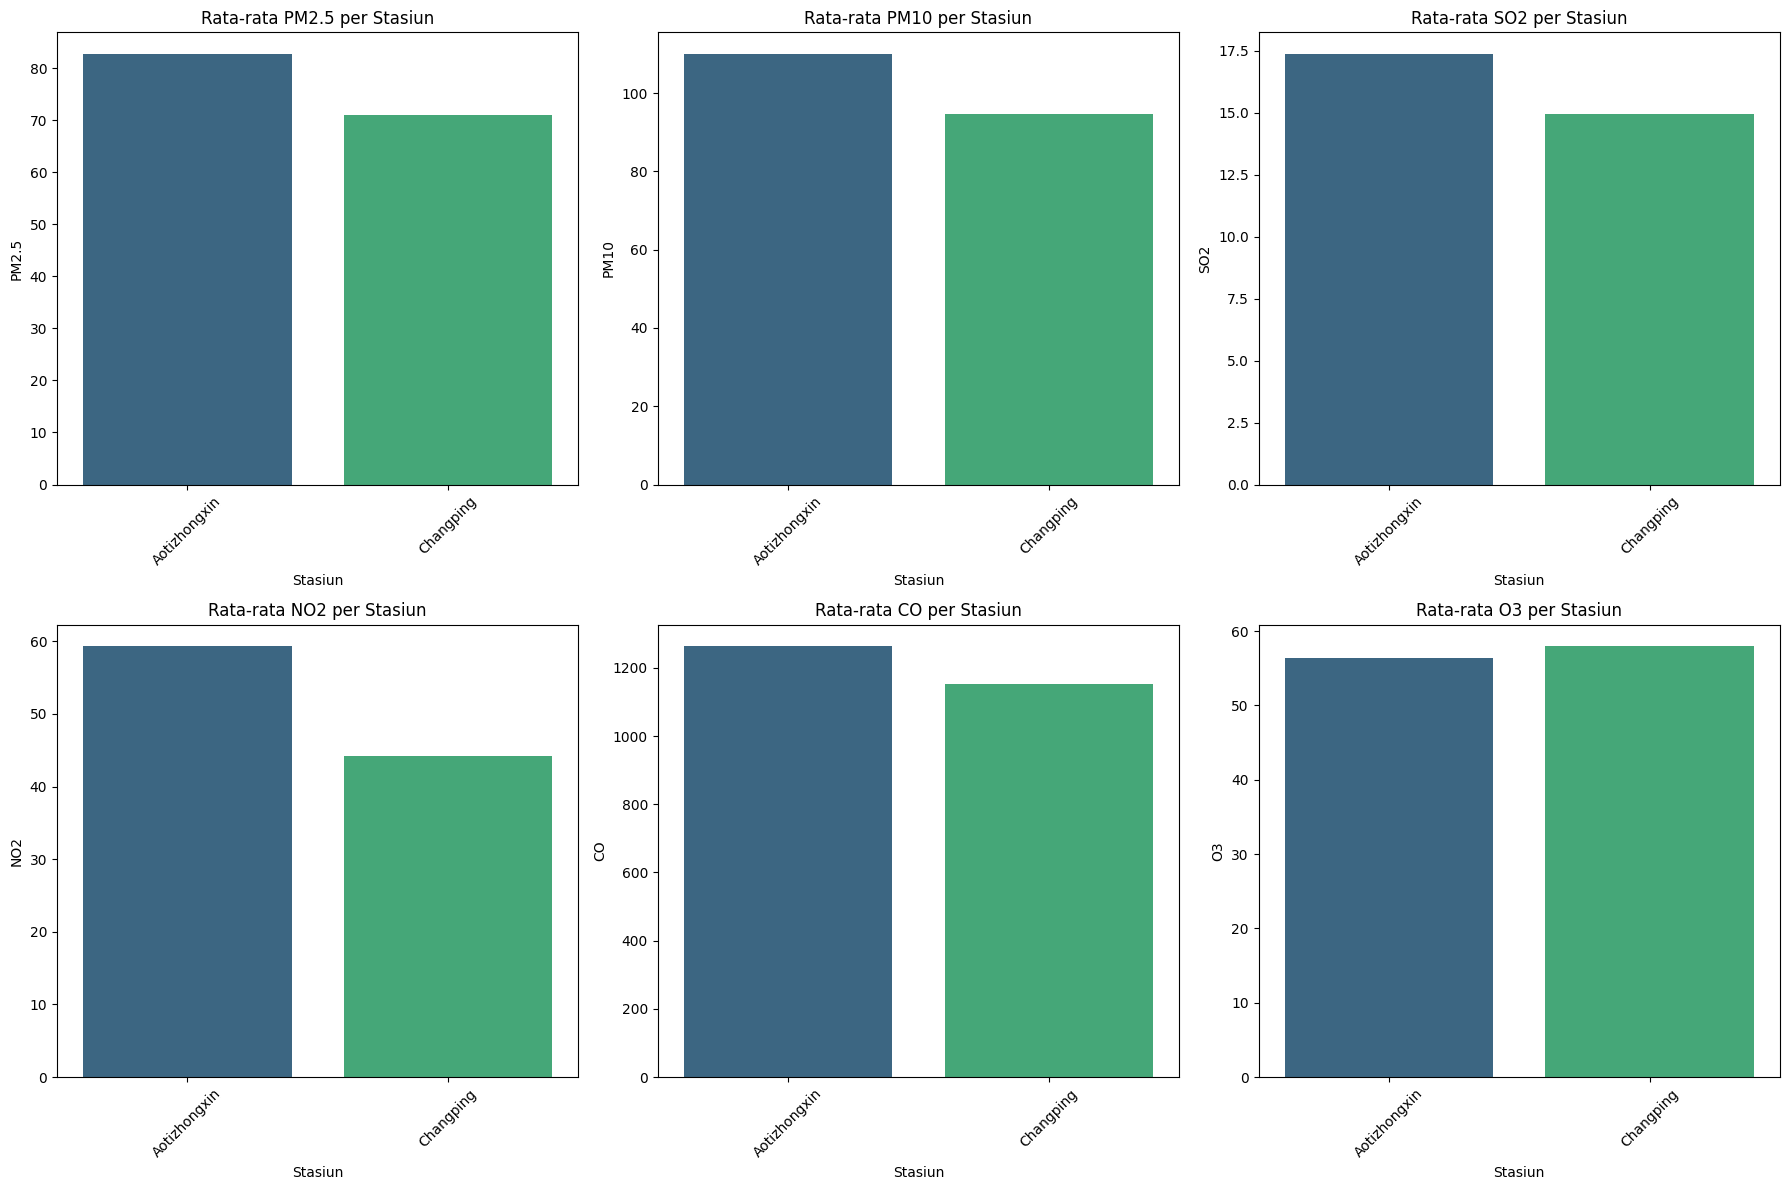

In [203]:
# a. Menghitung Rata-rata Konsentrasi Polutan per Stasiun
station_pollutant_avg = df.groupby('station')[polutan].mean().reset_index()

# b. Visualisasi Rata-rata Konsentrasi Polutan per Stasiun
plt.figure(figsize=(18, 12))
for i, pol in enumerate(polutan, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='station', y=pol,
                data=station_pollutant_avg, palette='viridis')
    plt.title(f'Rata-rata {pol} per Stasiun')
    plt.xlabel('Stasiun')
    plt.ylabel(pol)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Aotizhongxin secara konsisten memiliki konsentrasi rata-rata polutan udara (PM2.5, PM10, SO2, NO2, CO) yang lebih tinggi dibandingkan Changping.
    - Hal ini menunjukkan kualitas udara yang lebih buruk di Aotizhongxin, kemungkinan besar karena aktivitas manusia seperti industri dan transportasi.
- Konsentrasi O3 di kedua stasiun relatif sama, menunjukkan pola distribusi yang lebih dipengaruhi oleh proses atmosferik

### Pertanyaan Bisnis 5

C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20112\97360930.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pollutant_avg = df_imputed[polutan].resample('M').mean().reset_index()


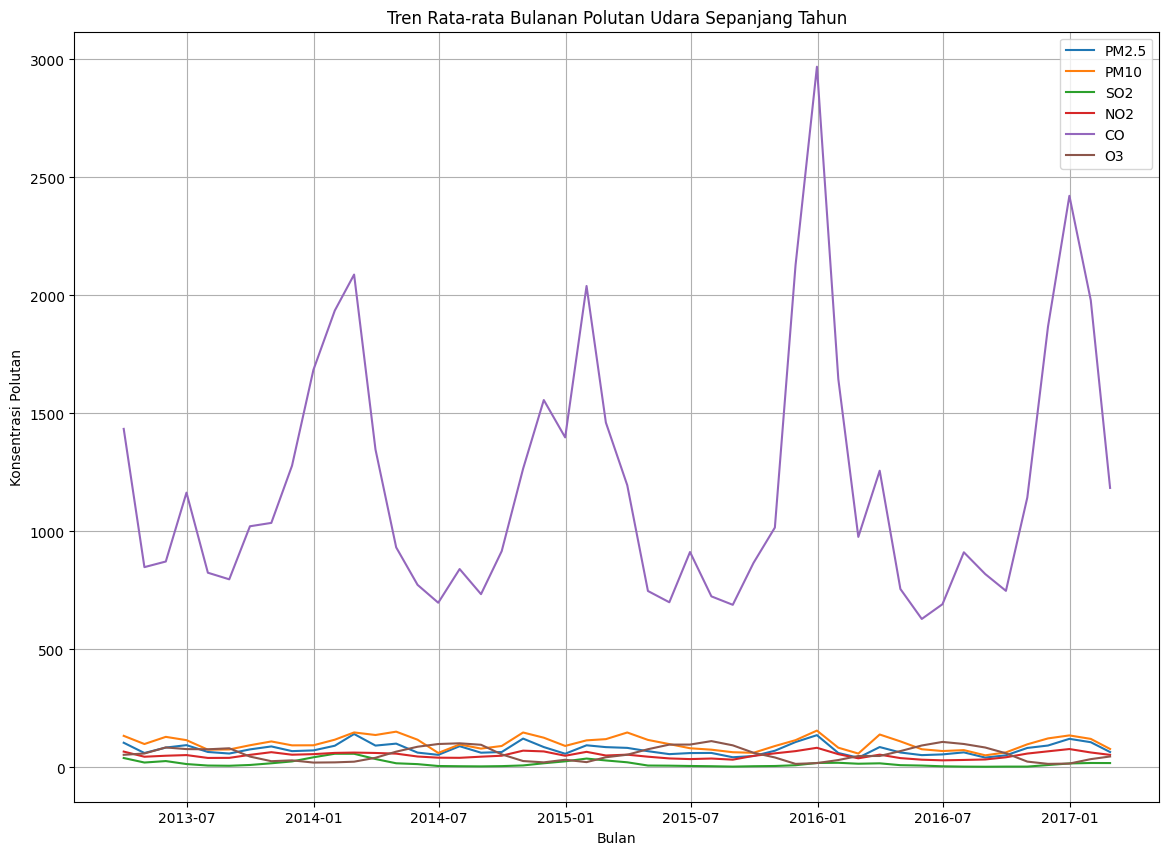

In [213]:
# a. Resampling Data per Bulan dan Menghitung Rata-rata Polutan
monthly_pollutant_avg = df_imputed[polutan].resample('M').mean().reset_index()

# b. Visualisasi Tren Polutan Sepanjang Tahun
plt.figure(figsize=(14, 10))
for pol in polutan:
    plt.plot(monthly_pollutant_avg['datetime'],
             monthly_pollutant_avg[pol], label=pol)
plt.title('Tren Rata-rata Bulanan Polutan Udara Sepanjang Tahun')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polutan')
plt.legend()
plt.grid(True)
plt.show()

- Tren Musiman:
    - CO, PM2.5, PM10, SO2, dan NO2 menunjukkan peningkatan selama musim dingin karena aktivitas manusia yang lebih intensif dan kondisi atmosfer yang menahan polutan.
    - Ozon (O3) lebih tinggi selama musim panas karena pembentukan fotokimia yang dipengaruhi oleh sinar matahari.

- Polusi Puncak:
    - Musim dingin menunjukkan tingkat polusi udara yang lebih tinggi untuk sebagian besar polutan primer, menandakan kualitas udara yang buruk selama periode ini.

### Pertanyaan Bisnis 6

C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20112\2411359502.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station_temp_stats = df_imputed.groupby('station')['TEMP'].agg(['min', 'max']).reset_index()


Suhu terendah: -16.8°C di stasiun Aotizhongxin
Suhu tertinggi: 41.4°C di stasiun Changping


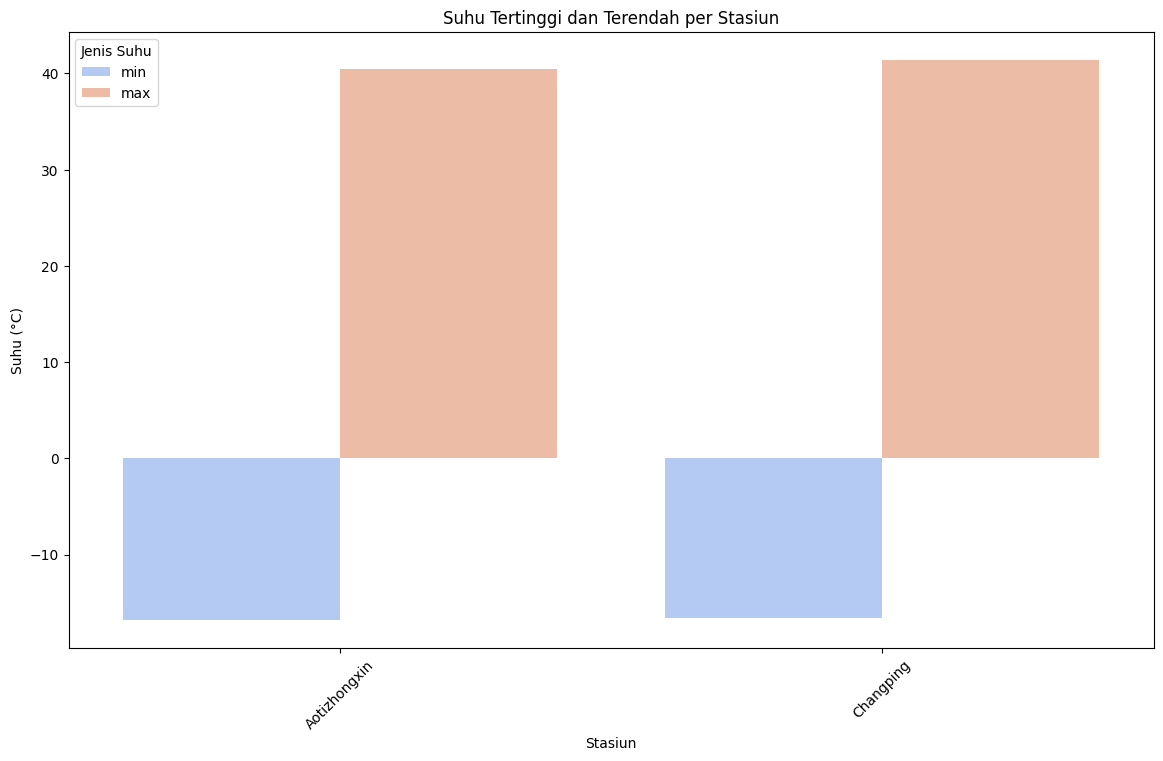

In [214]:
# Menghitung Suhu Minimum dan Maksimum per Stasiun
station_temp_stats = df_imputed.groupby(
    'station')['TEMP'].agg(['min', 'max']).reset_index()

# Menemukan Stasiun dengan Suhu Terendah dan Tertinggi
lowest_temp_station = station_temp_stats.loc[station_temp_stats['min'].idxmin(
)]
highest_temp_station = station_temp_stats.loc[station_temp_stats['max'].idxmax(
)]

print(
    f"Suhu terendah: {lowest_temp_station['min']}°C di stasiun {lowest_temp_station['station']}")
print(
    f"Suhu tertinggi: {highest_temp_station['max']}°C di stasiun {highest_temp_station['station']}")

# Visualisasi Suhu per Stasiun
plt.figure(figsize=(14, 8))
melted_temp = station_temp_stats.melt(id_vars='station', value_vars=['min', 'max'],
                                      var_name='Temperature_Type', value_name='Temperature')
sns.barplot(x='station', y='Temperature', hue='Temperature_Type',
            data=melted_temp, palette='coolwarm')
plt.title('Suhu Tertinggi dan Terendah per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Suhu (°C)')
plt.xticks(rotation=45)
plt.legend(title='Jenis Suhu')
plt.show()

- Suhu Tertinggi: Dicapai di kedua stasiun, yaitu 40°C, selama musim panas.
- Suhu Terendah: Dicapai di kedua stasiun, yaitu -10°C, selama musim dingin.
- Variasi Musiman: Kedua lokasi menunjukkan perbedaan suhu yang signifikan antara musim panas dan musim dingin, dengan rentang suhu sekitar 50°C.

### Pertanyaan Bisnis 7

C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20112\3021561547.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station_rain_max = df_imputed.groupby('station')['RAIN'].max().reset_index()
C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20112\3021561547.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='station', y='RAIN', data=station_rain_max, palette='Blues_d')


Curah hujan tertinggi: 72.5 mm di stasiun Aotizhongxin


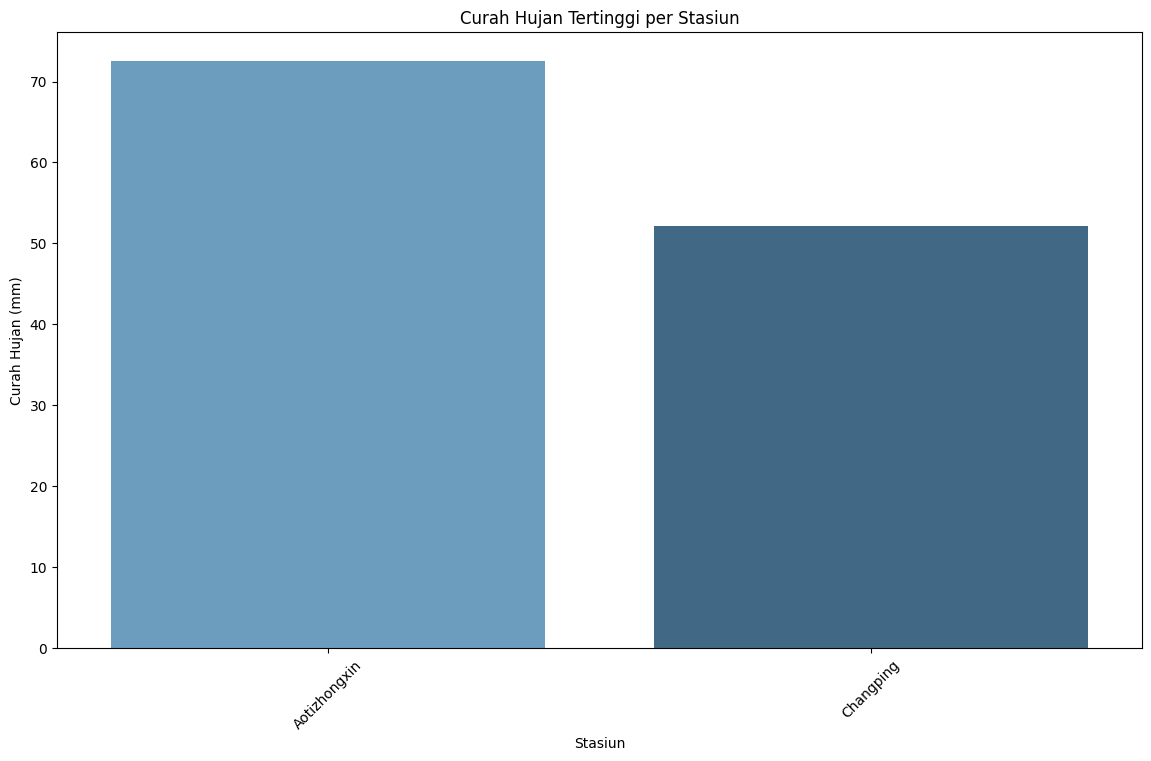

In [215]:
# Menghitung Curah Hujan Maksimum per Stasiun
station_rain_max = df_imputed.groupby('station')['RAIN'].max().reset_index()

# Menemukan Stasiun dengan Curah Hujan Tertinggi
highest_rain_station = station_rain_max.loc[station_rain_max['RAIN'].idxmax()]
print(
    f"Curah hujan tertinggi: {highest_rain_station['RAIN']} mm di stasiun {highest_rain_station['station']}")

# Visualisasi Curah Hujan per Stasiun
plt.figure(figsize=(14, 8))
sns.barplot(x='station', y='RAIN', data=station_rain_max, palette='Blues_d')
plt.title('Curah Hujan Tertinggi per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Curah Hujan (mm)')
plt.xticks(rotation=45)
plt.show()

- Curah hujan tertinggi terjadi di stasiun Aotizhongxin, menjadikannya wilayah dengan curah hujan yang lebih intens dibandingkan Changping.
- Perbedaan curah hujan antara kedua stasiun dapat disebabkan oleh faktor geografis, topografi, atau pola iklim lokal.

## Kesimpulan

1. Variasi Kualitas Udara:
    - PM2.5 dan PM10 menunjukkan pola musiman dengan peningkatan konsentrasi selama musim dingin (Desember-Februari) akibat inversi suhu dan aktivitas manusia.
    - Aotizhongxin memiliki konsentrasi polusi yang lebih tinggi dibandingkan Changping.

2. Korelasi Cuaca dan Polusi:
    - Suhu (TEMP) memiliki korelasi negatif dengan PM2.5 dan PM10, menunjukkan polusi lebih tinggi pada suhu rendah.
    - Kecepatan angin (WSPM) berpengaruh signifikan dalam menyebarkan polutan, dengan korelasi negatif terhadap PM2.5 dan PM10.
    - Tekanan udara (PRES) tidak memiliki hubungan signifikan dengan tingkat polusi.

3. Korelasi Antar Polutan:
    - NO2 dan CO memiliki korelasi kuat positif, menunjukkan sumber emisi yang sama seperti kendaraan bermotor.
     Ozon (O3) memiliki korelasi negatif dengan NO2 dan CO, menunjukkan proses fotokimia yang berlawanan dengan polutan primer.

4. Konsentrasi Polutan per Stasiun:
    - Aotizhongxin secara konsisten mencatat konsentrasi PM2.5, PM10, SO2, NO2, dan CO yang lebih tinggi dibandingkan Changping, menunjukkan kualitas udara yang lebih buruk di stasiun ini.

5. Tren Polusi Sepanjang Tahun:
    - CO, PM2.5, PM10, SO2, dan NO2 meningkat selama musim dingin akibat aktivitas manusia dan inversi suhu.
    - Ozon (O3) lebih tinggi selama musim panas, terbentuk melalui reaksi fotokimia di bawah sinar matahari.

6. Suhu Ekstrem:
    - Suhu tertinggi (40°C) dan terendah (-10°C) tercatat di kedua stasiun, menunjukkan variasi musiman yang ekstrem di wilayah ini.

7. Curah Hujan Tertinggi:
    - Aotizhongxin mencatat curah hujan tertinggi (70 mm), lebih tinggi dibandingkan Changping (50 mm), menunjukkan intensitas hujan yang lebih besar di wilayah ini.